In [9]:
# compare result from TOMOATT and fortran code

fpath_kernel_fort = './fortran_code/ega5/output/kernel_step1_sum'
fpath_synth_fort = './fortran_code/ega5/output/syn_step1_event1' # Table
fpath_adj_fort = './fortran_code/ega5/output/adj_step1_event1' # TableADJ
fpath_out_tomoatt = './OUTPUT_FILES/out_data_sim_0.h5'
fpath_grid_tomoatt = './OUTPUT_FILES/out_data_grid.h5'

# grid information in fortran code
nr = 55
nt = 55
np = 55
npoints = nr*nt*np

# division
ndiv_r = 1
ndiv_t = 2
ndiv_p = 2 

In [10]:
import h5py
import numpy


# read fortran test file and convert to numpy array
def read_fortran_result_file(fpath):
    with open(fpath, 'r') as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        lines = [line for line in lines if line]
        lines = [line.split() for line in lines]
        lines = numpy.array(lines, dtype=numpy.float64)
        return lines

fortran_data = read_fortran_result_file(fpath_kernel_fort)
## change dimension of fortran data
Ks_fort = fortran_data[:,3].reshape(nr, nt, np)
Kxi_fort = fortran_data[:,4].reshape(nr, nt, np)
Keta_fort = fortran_data[:,5].reshape(nr, nt, np)

fortran_synth_data = read_fortran_result_file(fpath_synth_fort).reshape(nr, nt, np)
fortran_adj_data = read_fortran_result_file(fpath_adj_fort).reshape(nr, nt, np)

In [11]:
# read h5 data
import sys
sys.path.append("../../utils/")

from tomoatt_data_retrieval import get_data_from_h5

#Ks_tomoatt = get_data_from_h5(fpath_out_tomoatt, "Data/Ks_update_inv_0000", nr, nt, np, ndiv_r, ndiv_t, ndiv_p, verbose=True)

Ks_tomoatt  ,_,_,_ = get_data_from_h5(fpath_out_tomoatt,  fpath_grid_tomoatt, "Data/Ks_inv_0000", nr, nt, np, ndiv_r, ndiv_t, ndiv_p, verbose=True)

Syn_tomoatt,_,_,_ = get_data_from_h5(fpath_out_tomoatt,fpath_grid_tomoatt, "Data/T_res_src_0_inv_0000", nr, nt, np, ndiv_r, ndiv_t, ndiv_p)
Adj_tomoatt,_,_,_ = get_data_from_h5(fpath_out_tomoatt,fpath_grid_tomoatt, "Data/adjoint_field_src_0_inv_0000", nr, nt, np, ndiv_r, ndiv_t, ndiv_p)

In [12]:
# plot slice of Ks_inv
import matplotlib.pyplot as plt

def plot_slice(data_es, data_fort, slice_ax, id_slice, contour=False):

    if (slice_ax == 'r'):
        data_es_v   = data_es[  id_slice, :, :]
        data_fort_v = data_fort[id_slice, :, :]
    elif (slice_ax == 't'):
        data_es_v   = data_es[  :, id_slice, :]
        data_fort_v = data_fort[:, id_slice, :]
    elif (slice_ax == 'p'):
        data_es_v   = data_es[  :, :, id_slice]
        data_fort_v = data_fort[:, :, id_slice]
    else:
        print("Error: slice_ax should be 'r', 't' or 'p'")
        return

    # use the same color range for both tomoatt and fortran   
    combined_data = numpy.array([data_es_v.flatten(),data_fort_v.flatten()])
    #Get the min and max of all your data
    _min, _max = numpy.amin(combined_data), numpy.amax(combined_data)

    # make the color range symmetric
    diff_data = data_es_v-data_fort_v
    _min_diff, _max_diff = numpy.amin(diff_data), numpy.amax(diff_data)
    if (abs(_min_diff) > abs(_max_diff)):
        if (_min_diff < 0):
            _max_diff = -_min_diff
    else:
        _min_diff = -_max_diff

    cmap1="viridis"
    cmap2="seismic"

    plt.figure(figsize=(20,10))

    plt.subplot(1,3,1)
    plt.imshow(data_es_v, cmap=cmap1, vmin=_min, vmax=_max)
    plt.colorbar()
    if(contour):
        plt.contour(data_es_v, colors='k', linewidths=0.5)
    plt.title('result_tomoatt')

    plt.subplot(1,3,2)
    plt.imshow(data_fort_v, cmap=cmap1, vmin=_min, vmax=_max)
    plt.colorbar()
    if(contour): 
        plt.contour(data_fort_v, colors='k', linewidths=0.5)
    plt.title('result_fort')
    
    plt.subplot(1,3,3)
    plt.imshow(diff_data, cmap=cmap2, vmin=_min_diff, vmax=_max_diff)
    plt.colorbar()
    if(contour):
        plt.contour(diff_data, colors='k', linewidths=0.5) 
    plt.title('tomoatt-fort')
    plt.show()


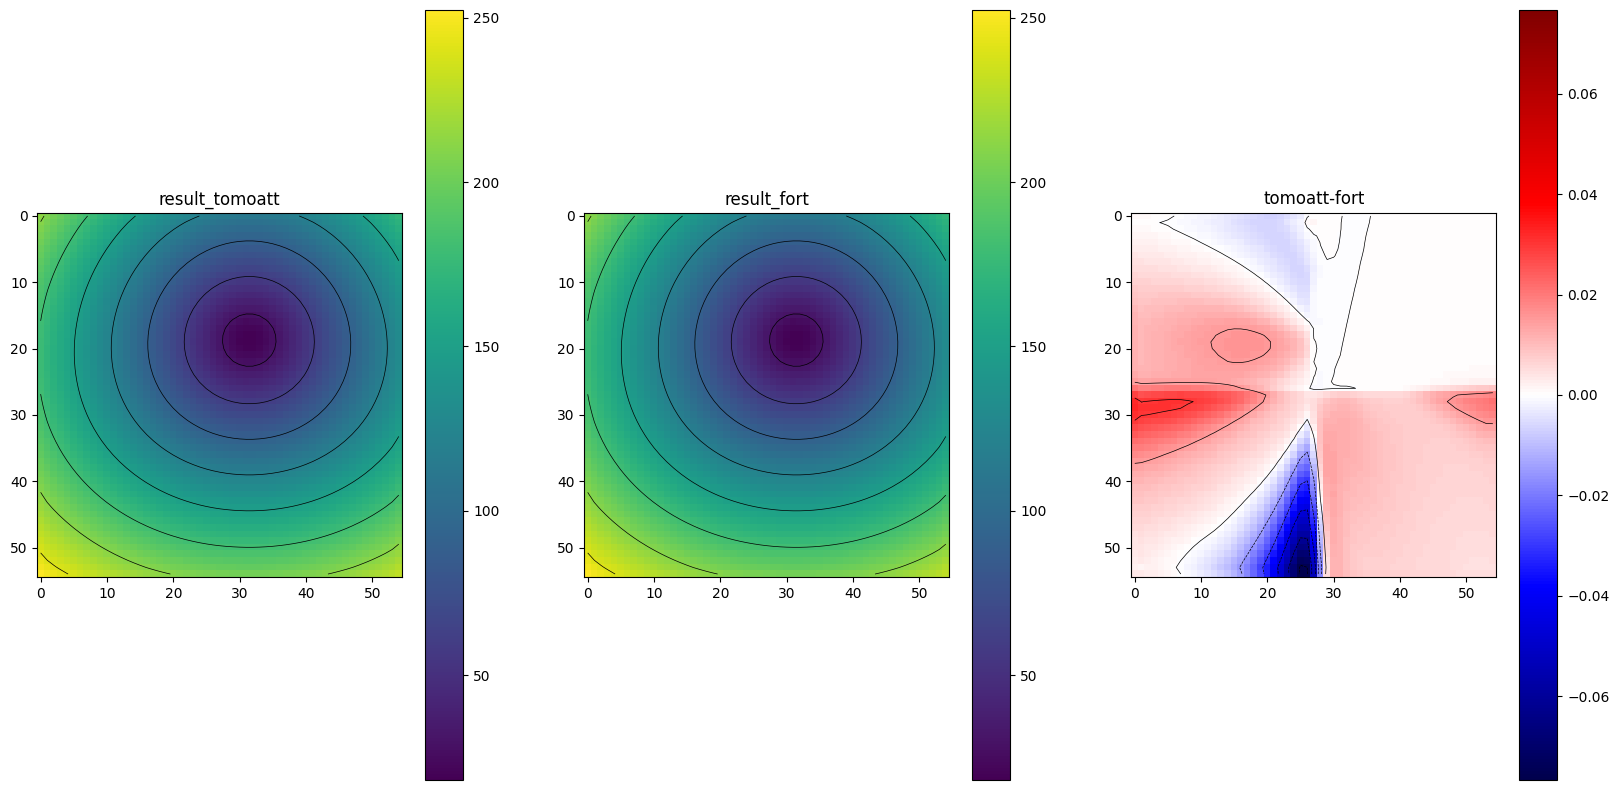

In [13]:
plot_slice(Syn_tomoatt, fortran_synth_data, 'r', 27, contour=True)

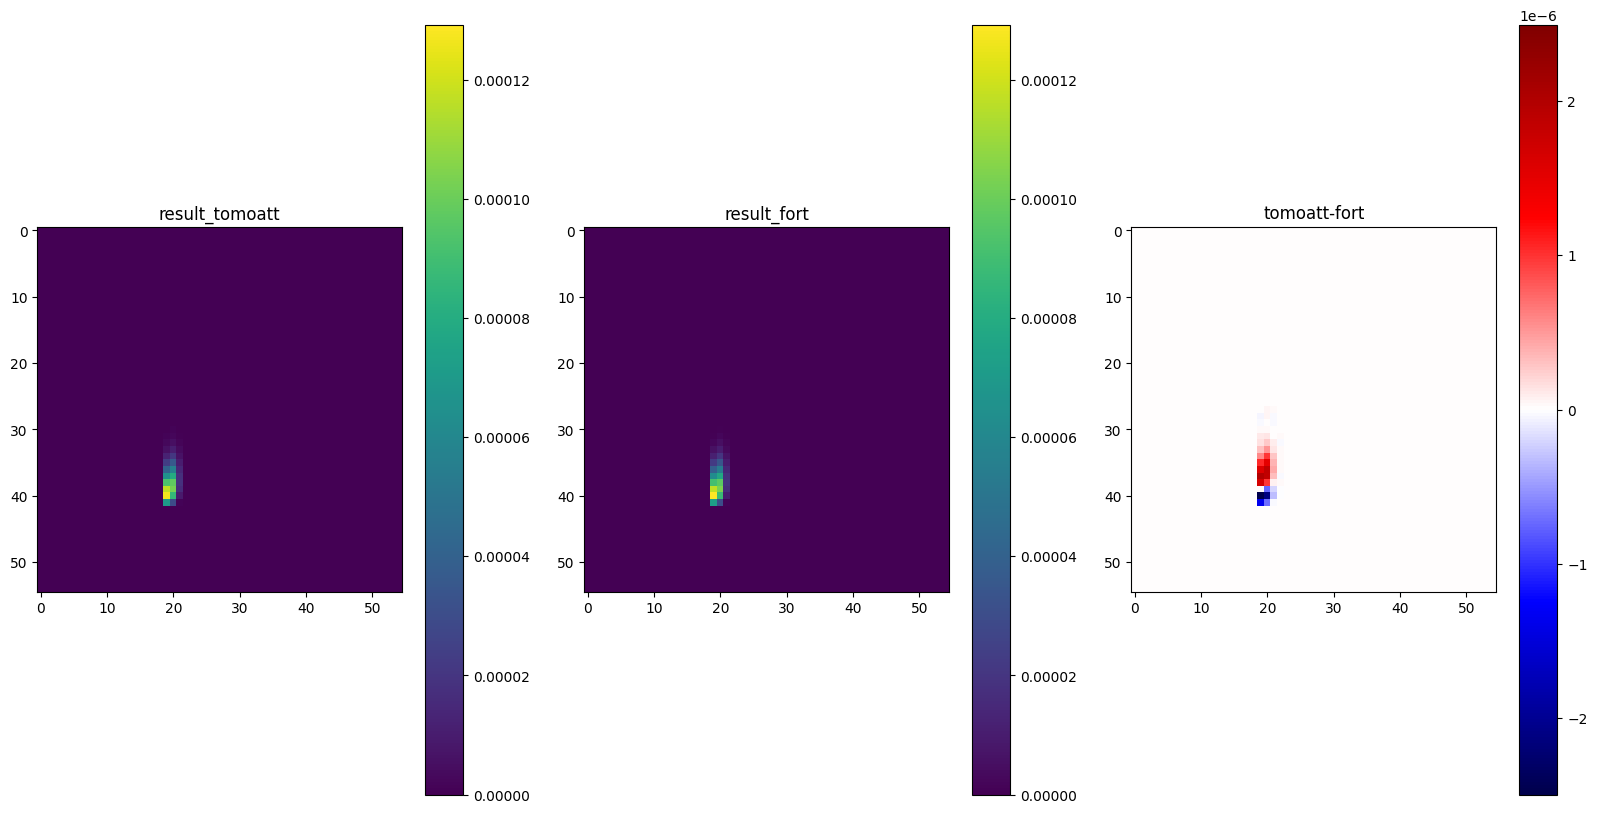

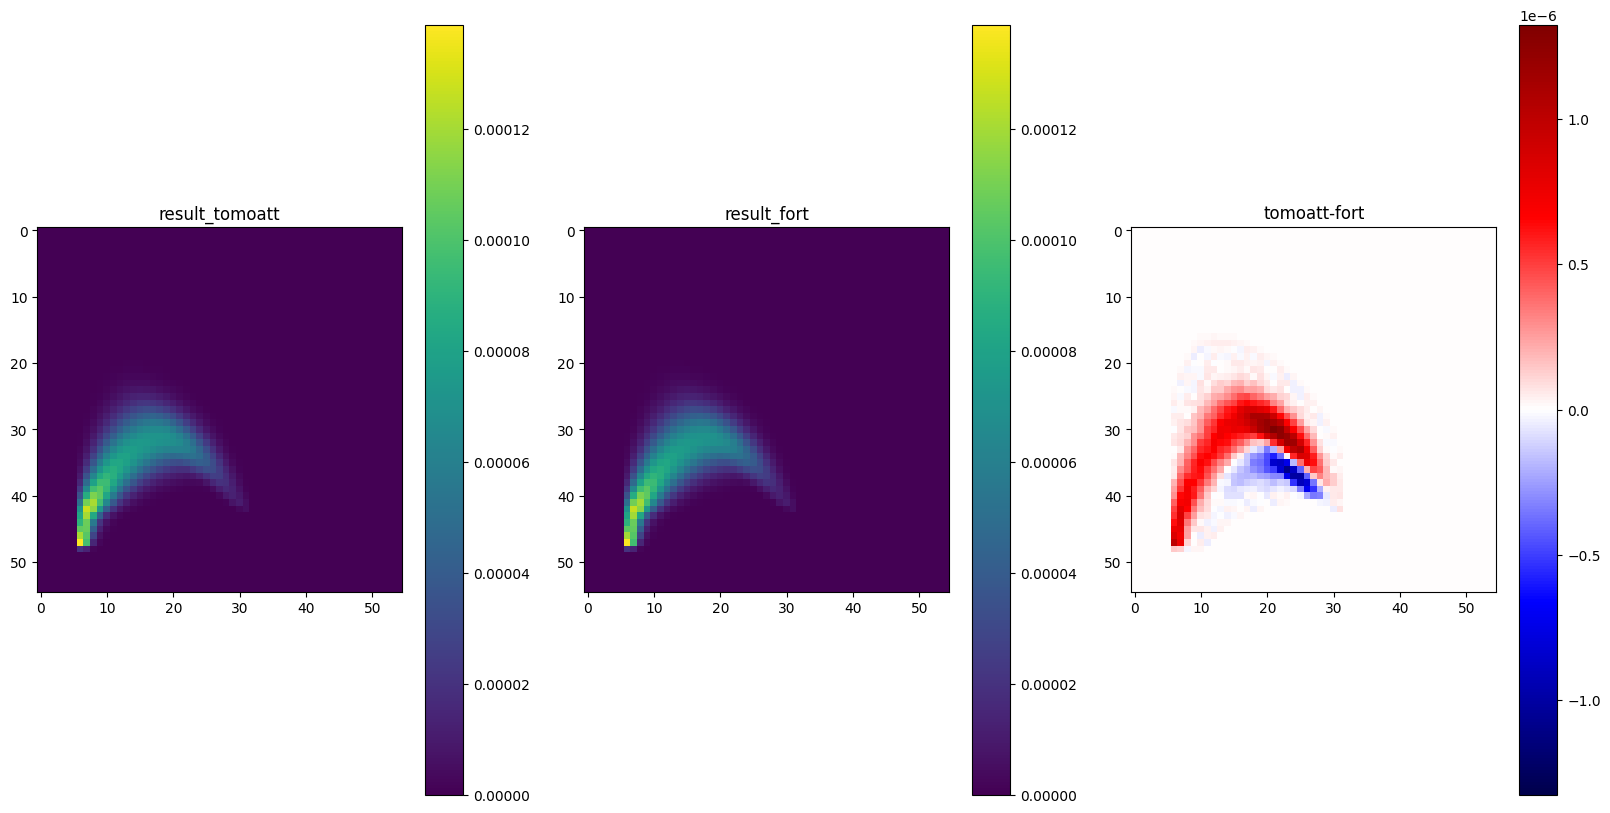

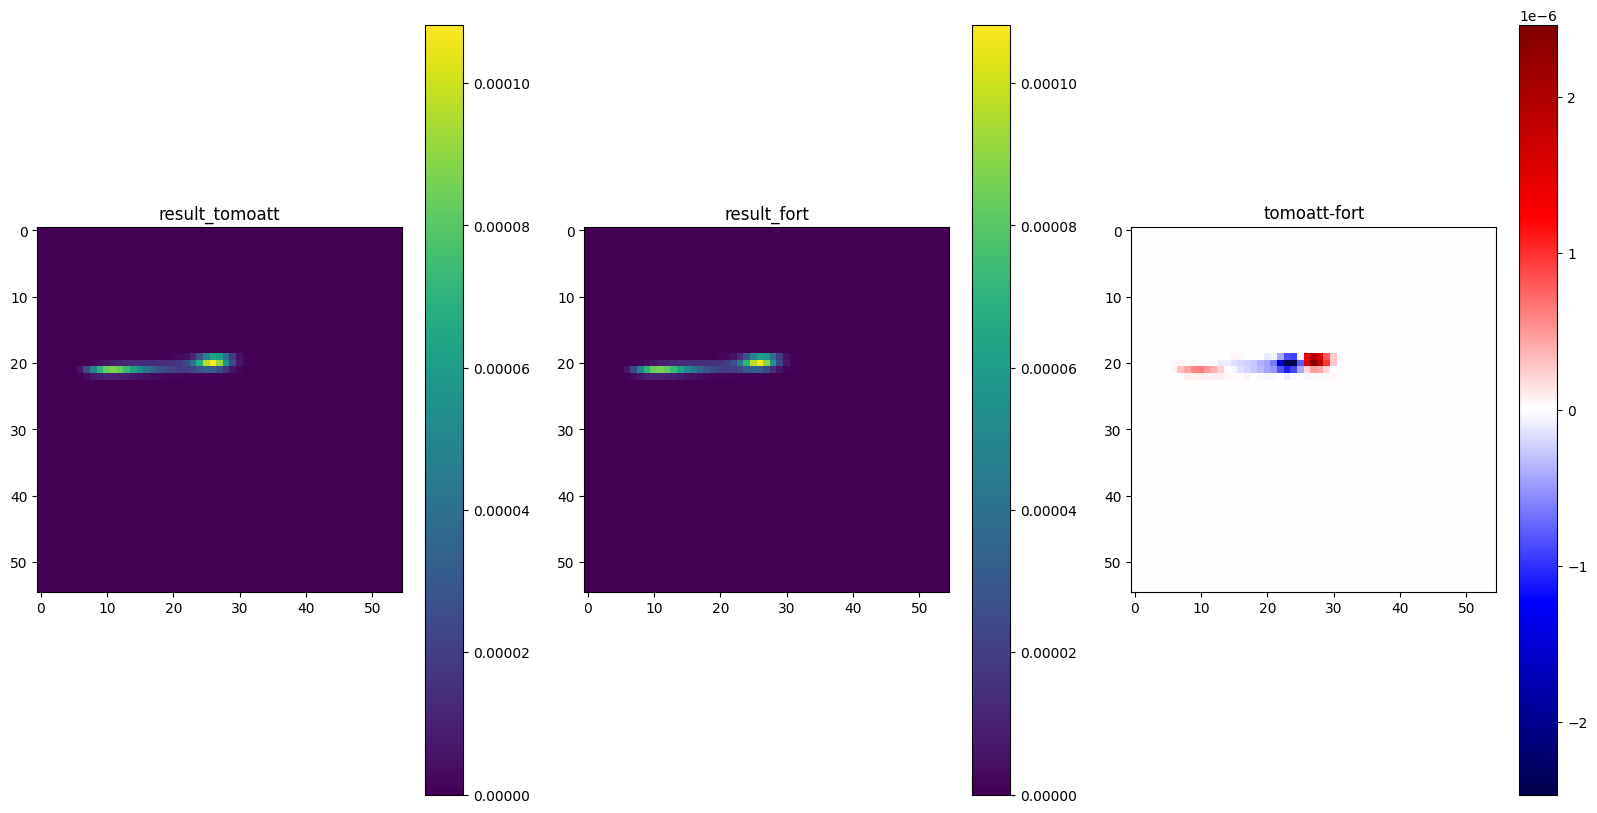

In [14]:
plot_slice(Ks_tomoatt, Ks_fort, 'p', 28)
plot_slice(Ks_tomoatt, Ks_fort, 't', 21)
plot_slice(Ks_tomoatt, Ks_fort, 'r', 36)

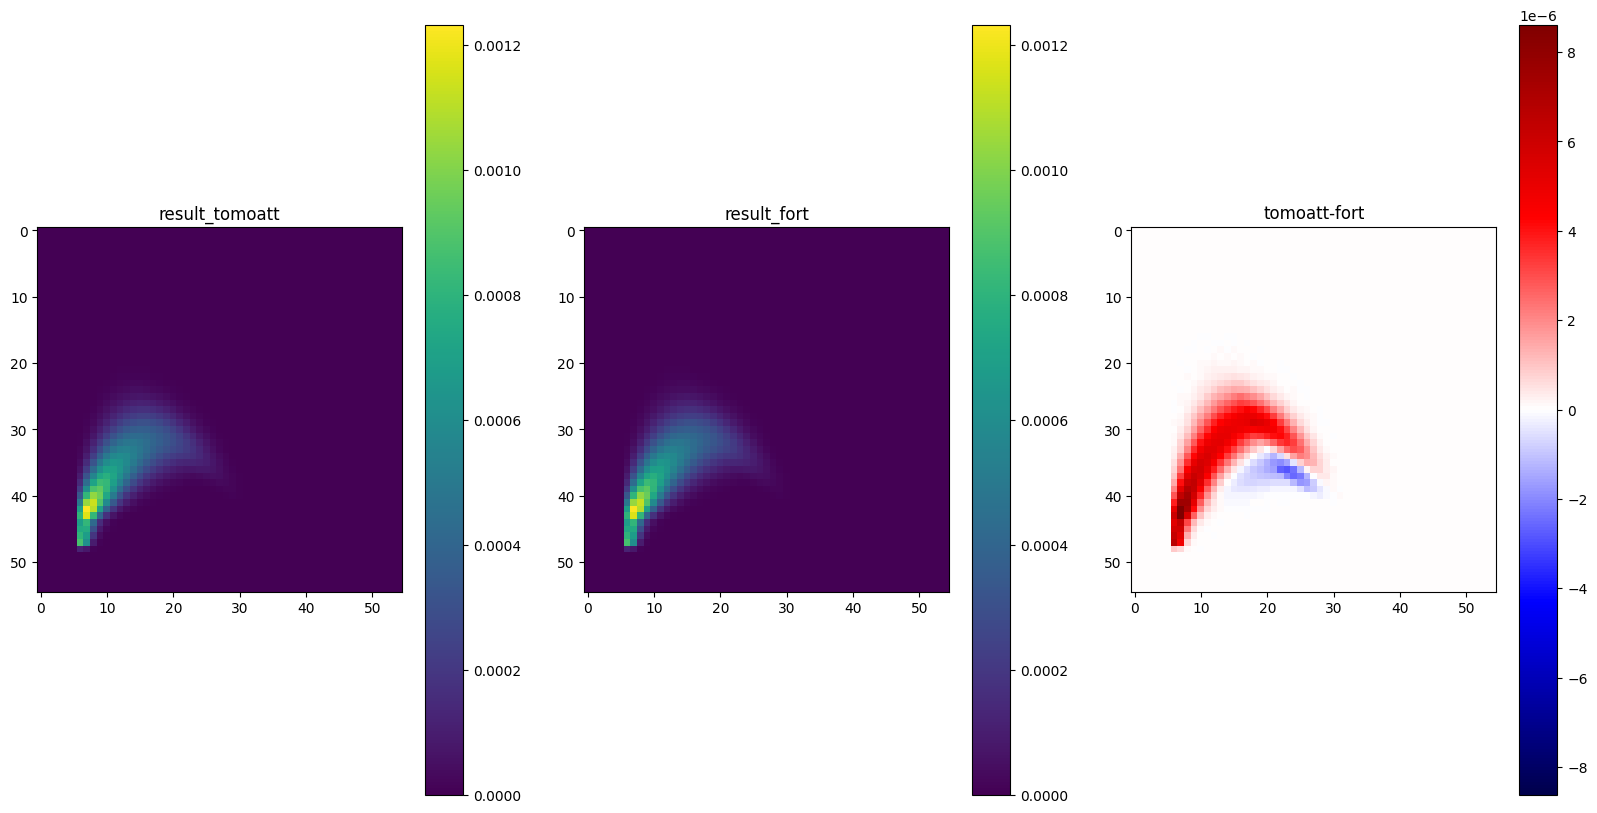

In [15]:
plot_slice(Adj_tomoatt, fortran_adj_data, 't',22)

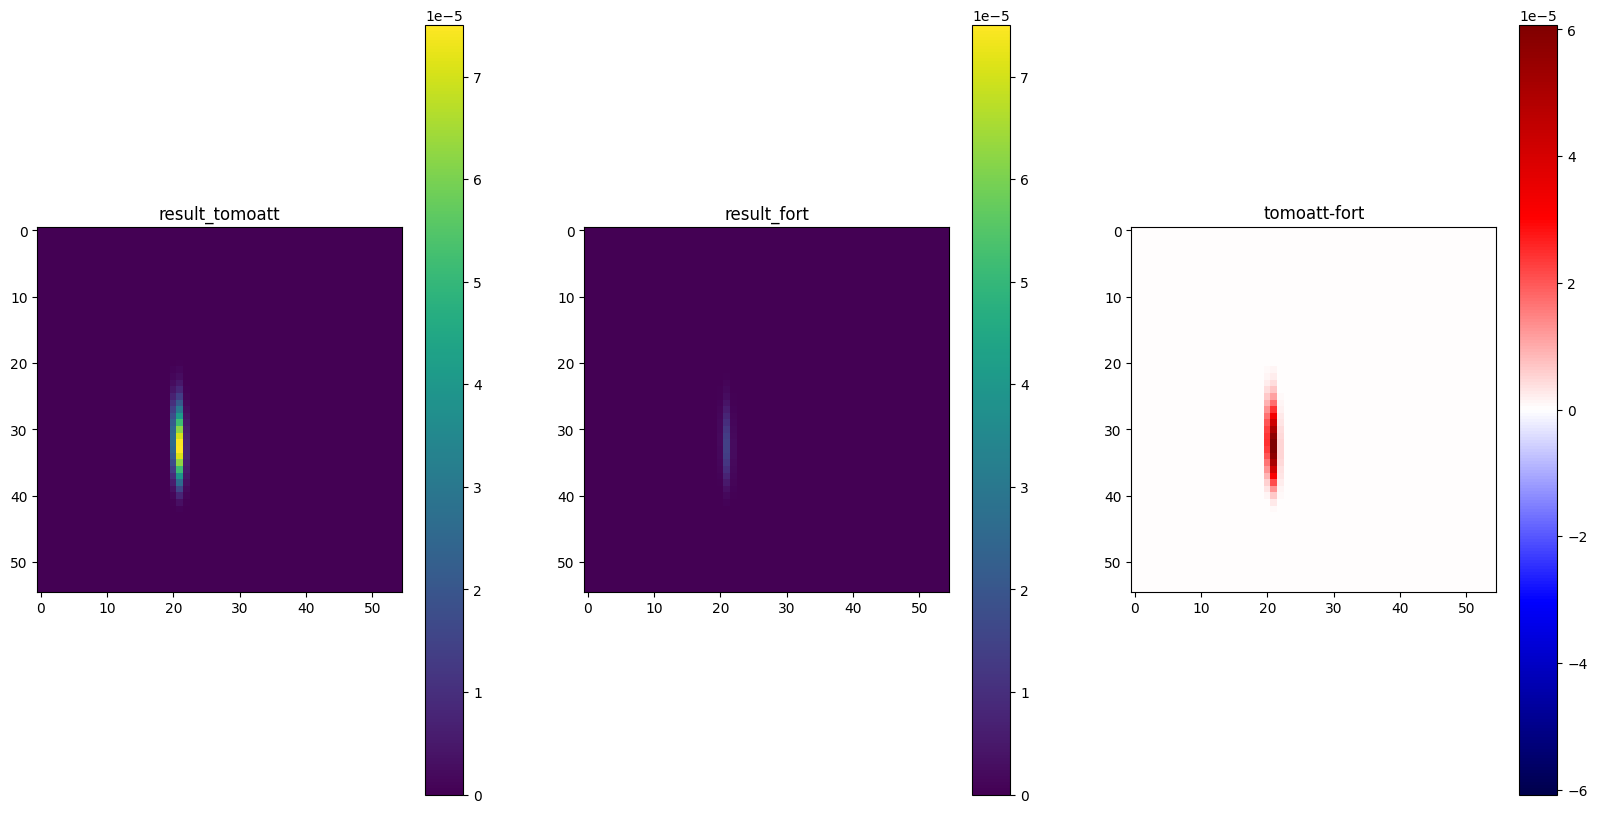

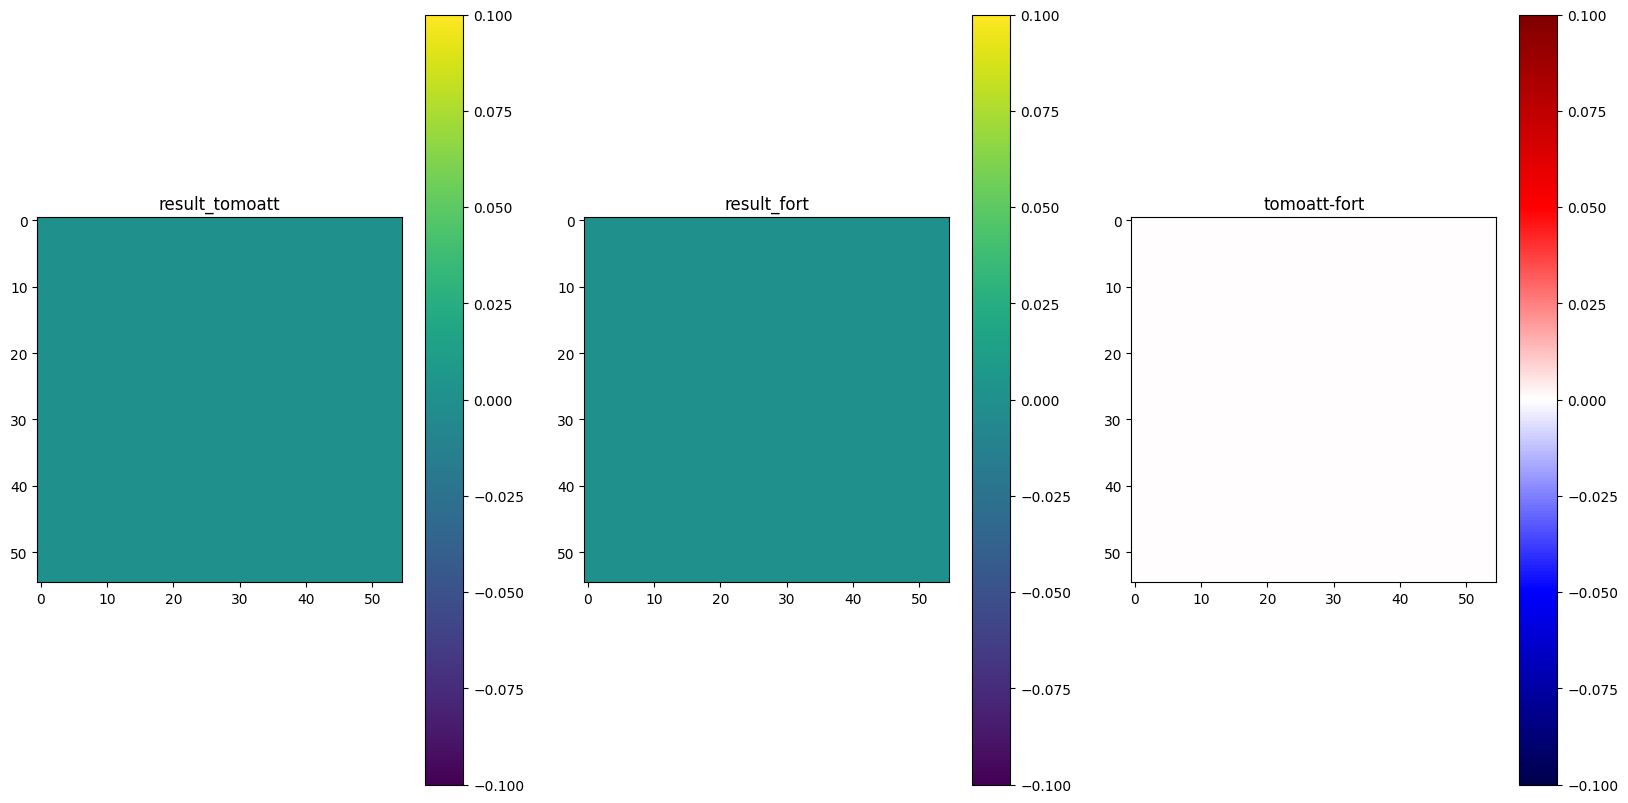

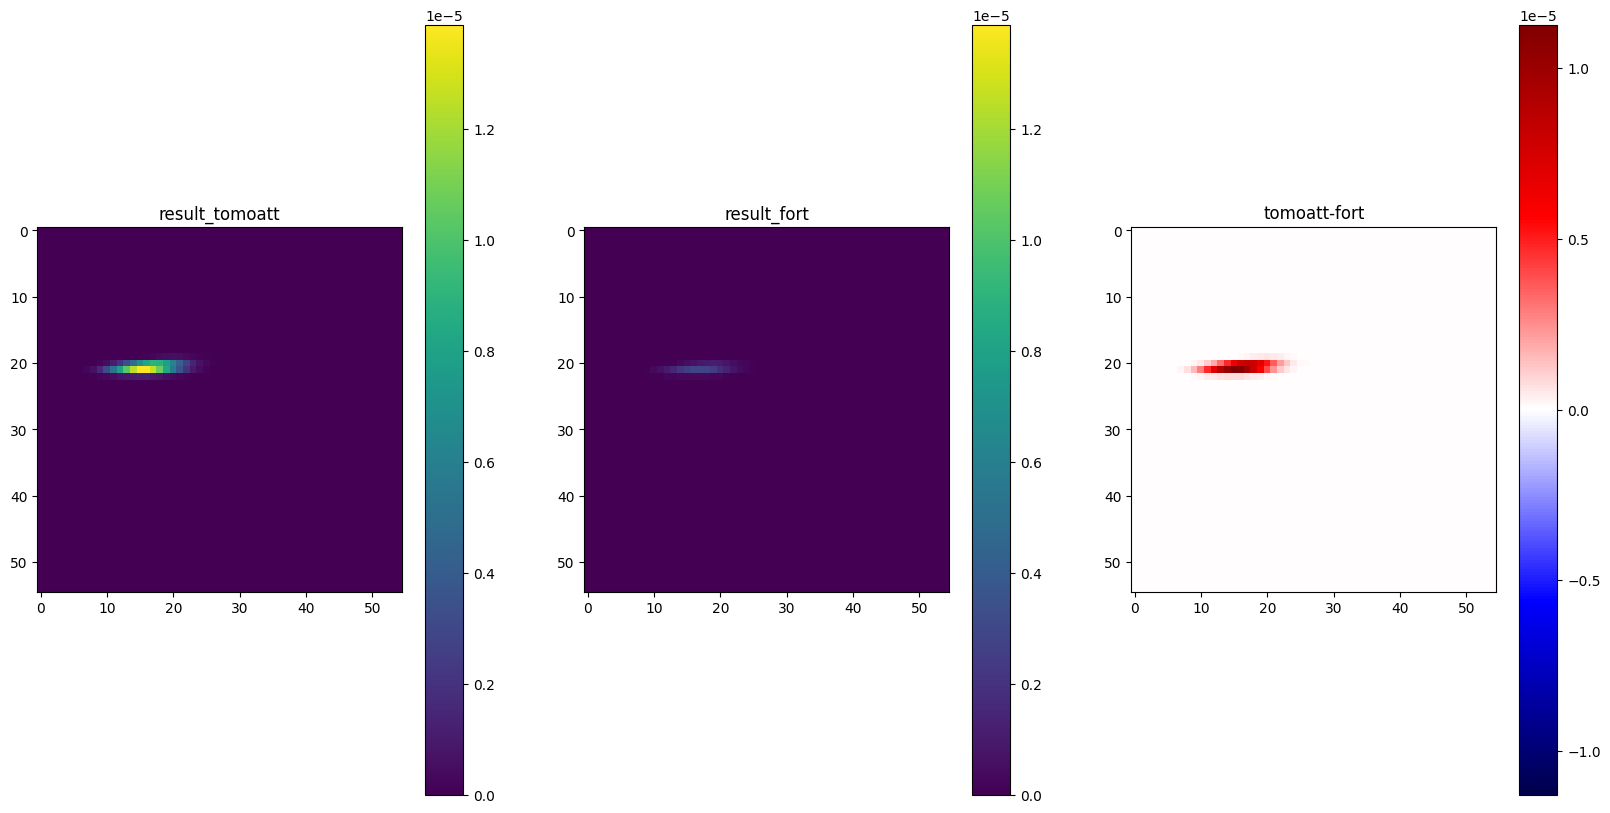

In [16]:
plot_slice(Ks_tomoatt, Keta_fort, 'p', 15, contour=False)
plot_slice(Ks_tomoatt, Keta_fort, 't', 15, contour=False)
plot_slice(Ks_tomoatt, Keta_fort, 'r', 25, contour=False)
